In [1]:
#PCA is well understood. SVD. 
#Reduce dimension. Linear transformation. 
#TSNE is non-linear and the same as PCA. 

In [57]:
import numpy as np 
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans #uses mean to find centers. only clusters in spherical.
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import SpectralClustering
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [59]:
df = pd.read_csv('iris.csv')

In [61]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
X = df.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]

In [65]:
pca = PCA(n_components=3)

In [67]:
pca.fit(X)

PCA(n_components=3)

In [69]:
pca.transform(X)

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [71]:
pca_result = pd.DataFrame(pca.transform(X), columns=['X1','X2','X3'])

In [73]:
pca_result.corr()

,X1,X2,X3
X1,1.000000e+00,5.112345e-16,-6.673006e-16
X2,5.112345e-16,1.000000e+00,1.494128e-16
X3,-6.673006e-16,1.494128e-16,1.000000e+00


In [75]:
pca_result['species'] = df.species

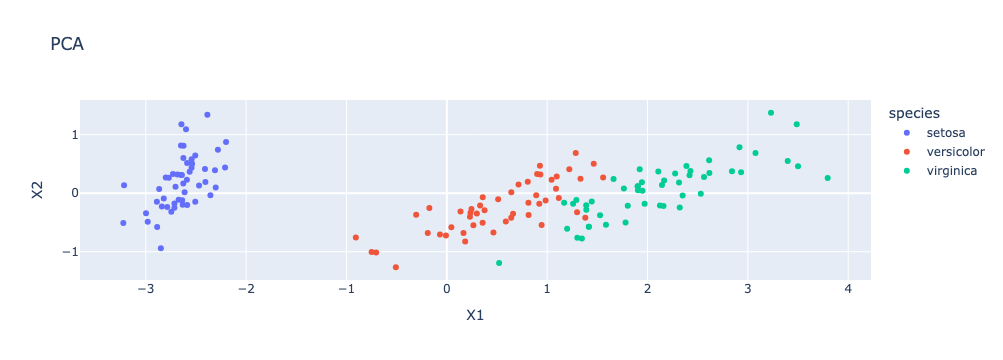

In [77]:
plot = px.scatter(data_frame = pca_result,
                 x = 'X1',
                 y = 'X2',
                color = 'species',
                 title = 'PCA')
plot.show()

In [80]:
#explain variance shows how much information was retained

In [82]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [84]:
dftwo = pd.read_csv('BostonHousing.csv')

In [86]:
dftwo.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [88]:
dftwo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [90]:
pcatwo = PCA(n_components = 3)

In [92]:
Y = dftwo.loc[:,['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat']]

In [94]:
pcatwo.fit(dftwo)

PCA(n_components=3)

In [96]:
explained_list = []

In [98]:
for n in [2,3,4,5,6,7]:
    pcatwo = PCA(n_components=n)
    pcatwo.fit(Y)
    explained_sum = pcatwo.explained_variance_ratio_.sum()
    explained_list.append(explained_sum)

In [100]:
explained_list

[0.9688751429772741,
 0.9902237521669696,
 0.9971807427797739,
 0.9984806947092334,
 0.9992079148676796,
 0.9996269594064087]

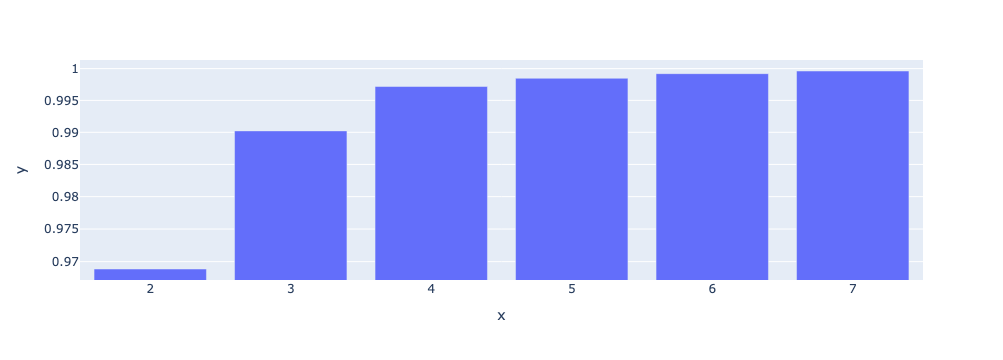

In [102]:
plottwo = px.bar(x = [2,3,4,5,6,7],
                 y = explained_list,
                log_y=True)
plottwo.show()

In [104]:
#Homework

In [106]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [123]:
kmeans = KMeans(n_clusters = 6).fit(Y)

In [125]:
kmeans.labels_

array([0, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 0, 5, 0, 0, 0, 0, 0, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 5, 5, 5, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2,
       2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4,
       2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 5, 5, 5, 0, 0,
       0, 2, 2, 0, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0,
       5, 0, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,

In [127]:
Y.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,cluster_1_labels
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,0.615888
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,-0.297180
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,0.650350
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,-0.025876
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,0.607449
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,-0.241692
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,0.463540
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,-0.504162
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,0.961104
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,0.938771


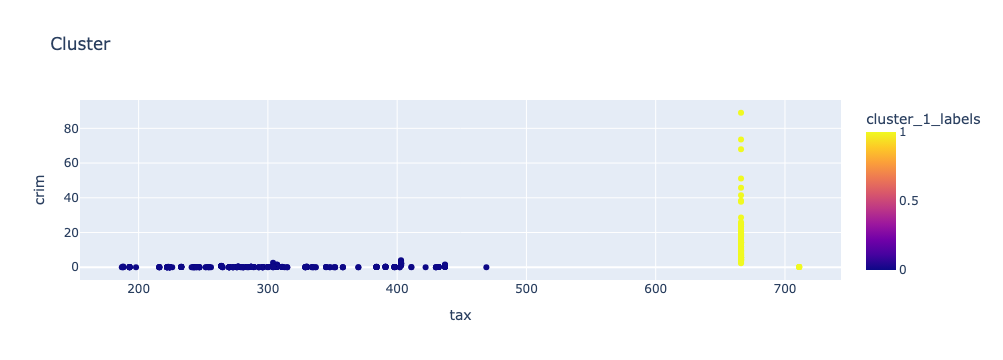

In [131]:
plot = px.scatter(data_frame=Y,
                 x = 'tax',
                 y = 'crim',
                color = 'cluster_1_labels',
                 title = 'Cluster')
plot.show()

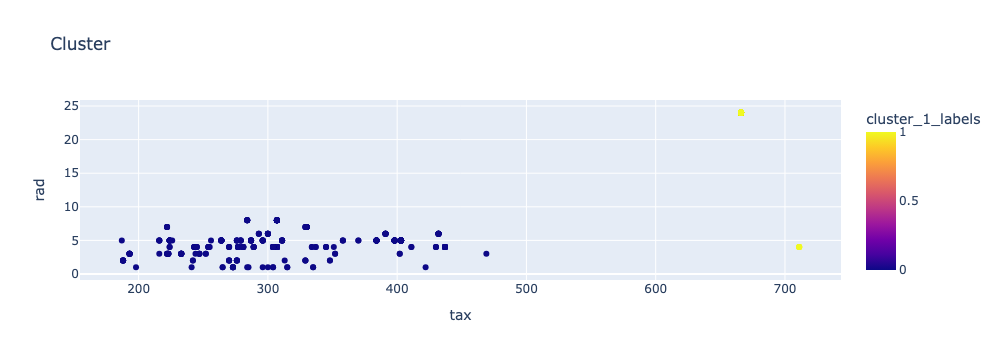

In [133]:
plot = px.scatter(data_frame=Y,
                 x = 'tax',
                 y = 'rad',
                color = 'cluster_1_labels',
                 title = 'Cluster')
plot.show()

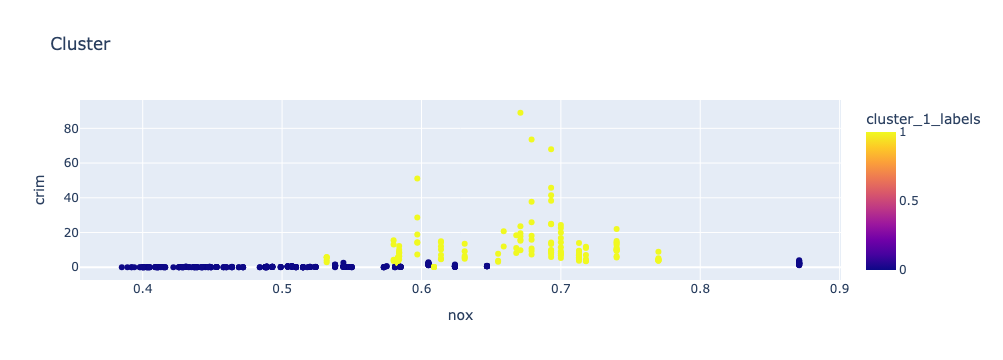

In [135]:
plot = px.scatter(data_frame=Y,
                 x = 'nox',
                 y = 'crim',
                color = 'cluster_1_labels',
                 title = 'Cluster')
plot.show()

In [178]:
pcatwo = PCA(n_components=2)

In [180]:
pcatwo.fit(Y)

PCA(n_components=2)

In [182]:
explained_list_two=[]

In [172]:
for n in [2,3,4,5,6,7]:
    pcatwo = PCA(n_components=n)
    pcatwo.fit(Y)
    explained_sum = pcatwo.explained_variance_ratio_.sum()
    explained_list_two.append(explained_sum)

In [174]:
explained_list_two

[0.9688746946426722,
 0.9902231968549529,
 0.9971801531677483,
 0.9984801509486813,
 0.9992073850033386,
 0.9996264848189824]

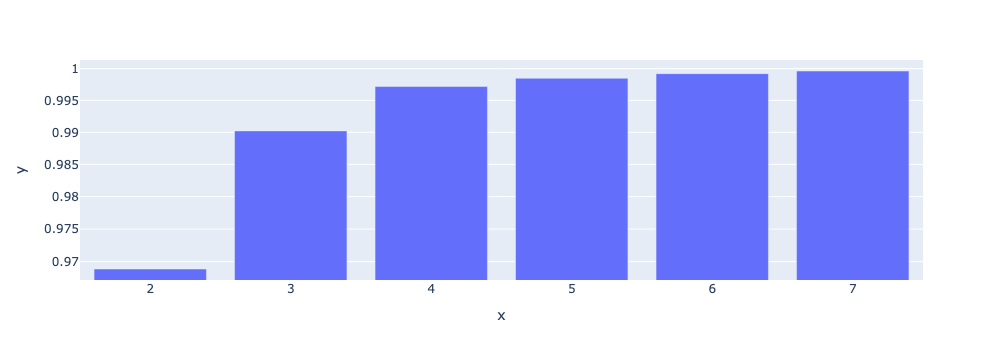

In [176]:
plotthree = px.bar(x = [2,3,4,5,6,7],
                 y = explained_list_two,
                log_y=True)
plotthree.show()

In [184]:
pcatwo.transform(Y)

array([[-119.81914628,   -5.56010321],
       [-168.89032805,   10.11607554],
       [-169.31187978,   14.08039722],
       ...,
       [-138.38741791,    0.9380132 ],
       [-137.5054318 ,    4.251747  ],
       [-139.19058534,    1.00898351]])

In [186]:
pca_resulttwo = pd.DataFrame(pcatwo.transform(Y), columns=['X1','X2'])

In [188]:
pca_resulttwo

,X1,X2
0,-119.819146,-5.560103
1,-168.890328,10.116076
2,-169.311880,14.080397
3,-190.230757,18.302291
4,-190.133566,16.097776
...,...,...
501,-138.698188,5.781404
502,-139.504691,1.039307
503,-138.387418,0.938013
504,-137.505432,4.251747


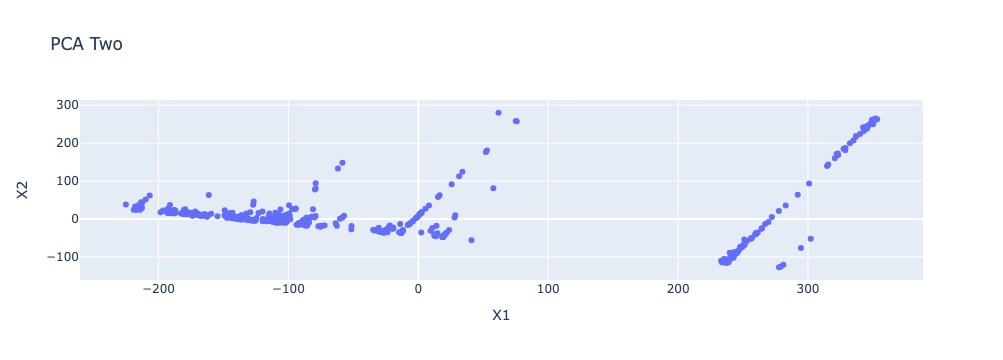

In [192]:
plotpcatwo = px.scatter(data_frame = pca_resulttwo,
                 x = 'X1',
                 y = 'X2',
                 title = 'PCA Two')
plotpcatwo.show()

In [224]:
kmeans = KMeans(n_clusters = 2).fit(pca_resulttwo)

In [226]:
pca_resulttwo['cluster_1_labels'] = kmeans.labels_

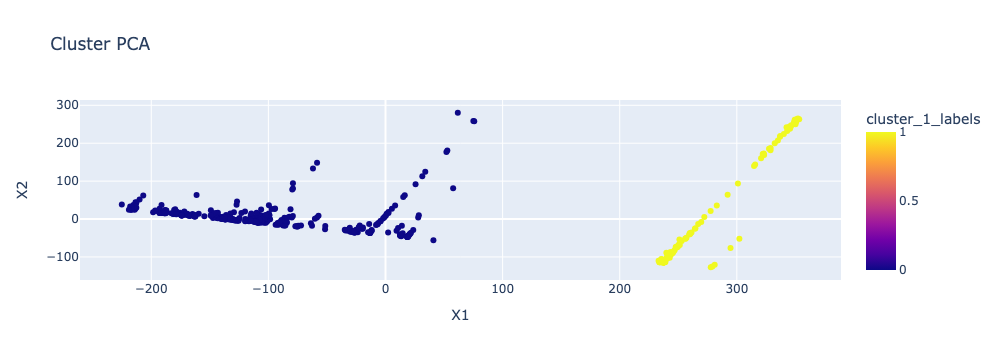

In [228]:
plot = px.scatter(data_frame=pca_resulttwo,
                 x = 'X1',
                 y = 'X2',
                color = 'cluster_1_labels',
                 title = 'Cluster PCA')
plot.show()